In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
inpDir = '/home/dai/Documents/DNN/Datasets/'
outDir = '/home/dai/Documents/DNN/Outputs/'

random_state = 24

test_size = 0.2

In [11]:
data_df = pd.read_csv(os.path.join(inpDir, 'breast_cancer_mod.csv'))

In [12]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [16]:
data_df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

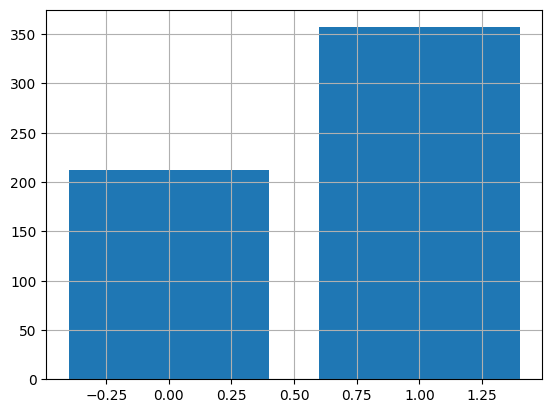

In [23]:
fig, ax= plt.subplots()

ax.bar(data_df.target.value_counts().index, data_df.target.value_counts().values)
ax.grid()

([<matplotlib.patches.Wedge at 0x7fd3e17cf010>,
 [Text(-0.4286546999573329, 1.0130425204326268, ''),
  Text(0.428654605109445, -1.013042560566172, '')])

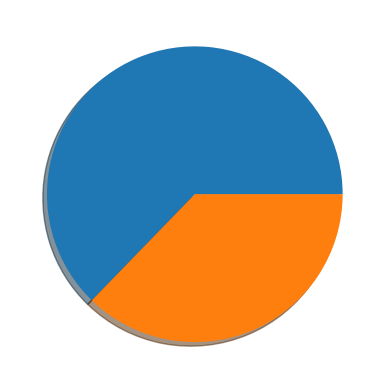

In [20]:
fig, ax= plt.subplots()

ax.pie(data_df.target.value_counts(), shadow=True)

In [24]:
features_df = data_df.drop('target', axis=1)
labels_df = data_df['target']
features_df.shape, labels_df.shape

((569, 30), (569,))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=test_size, random_state=random_state, stratify=labels_df)

In [27]:
X_train['total'] = X_train.astype(np.int64).sum(axis=1)
X_test['total'] = X_test.astype(np.int64).sum(axis=1)

In [28]:
X_train['target'] = y_train
X_test['target'] = y_test

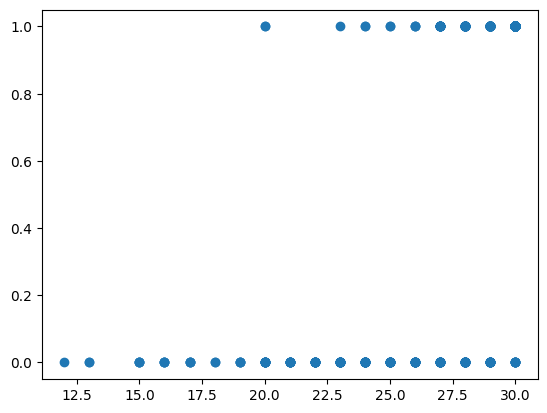

In [29]:
plt.scatter(X_train['total'], X_train['target'])
plt.show()

<Axes: xlabel='total'>

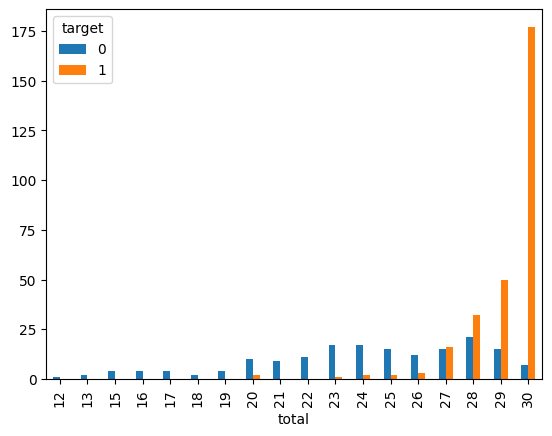

In [32]:
tmp_df = X_train.groupby(['total','target']).agg({'target': 'count'})
tmp_df.columns = ['count']
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total', columns='target', values='count').plot(kind='bar')

In [33]:
accuracy = {}

for b in range(X_train.shape[1]-1):
    X_train['pred'] = X_train['total'] >=b
    accuracy[b] = accuracy_score(X_train['pred'], X_train['target'])

In [34]:
accuracy

{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6329670329670329,
 15: 0.6329670329670329,
 16: 0.6417582417582418,
 17: 0.6505494505494506,
 18: 0.6593406593406593,
 19: 0.6637362637362637,
 20: 0.6725274725274726,
 21: 0.6901098901098901,
 22: 0.7098901098901099,
 23: 0.734065934065934,
 24: 0.7692307692307693,
 25: 0.8021978021978022,
 26: 0.8307692307692308,
 27: 0.8505494505494505,
 28: 0.8483516483516483,
 29: 0.8241758241758241,
 30: 0.7472527472527473}

In [36]:
best_b = max(accuracy, key= accuracy.get)
best_b

27

In [37]:
X_test['pred']= X_test['total'] >= best_b
accuracy_score(X_test['pred'], X_test['target'])

0.868421052631579